# Data Analysis:

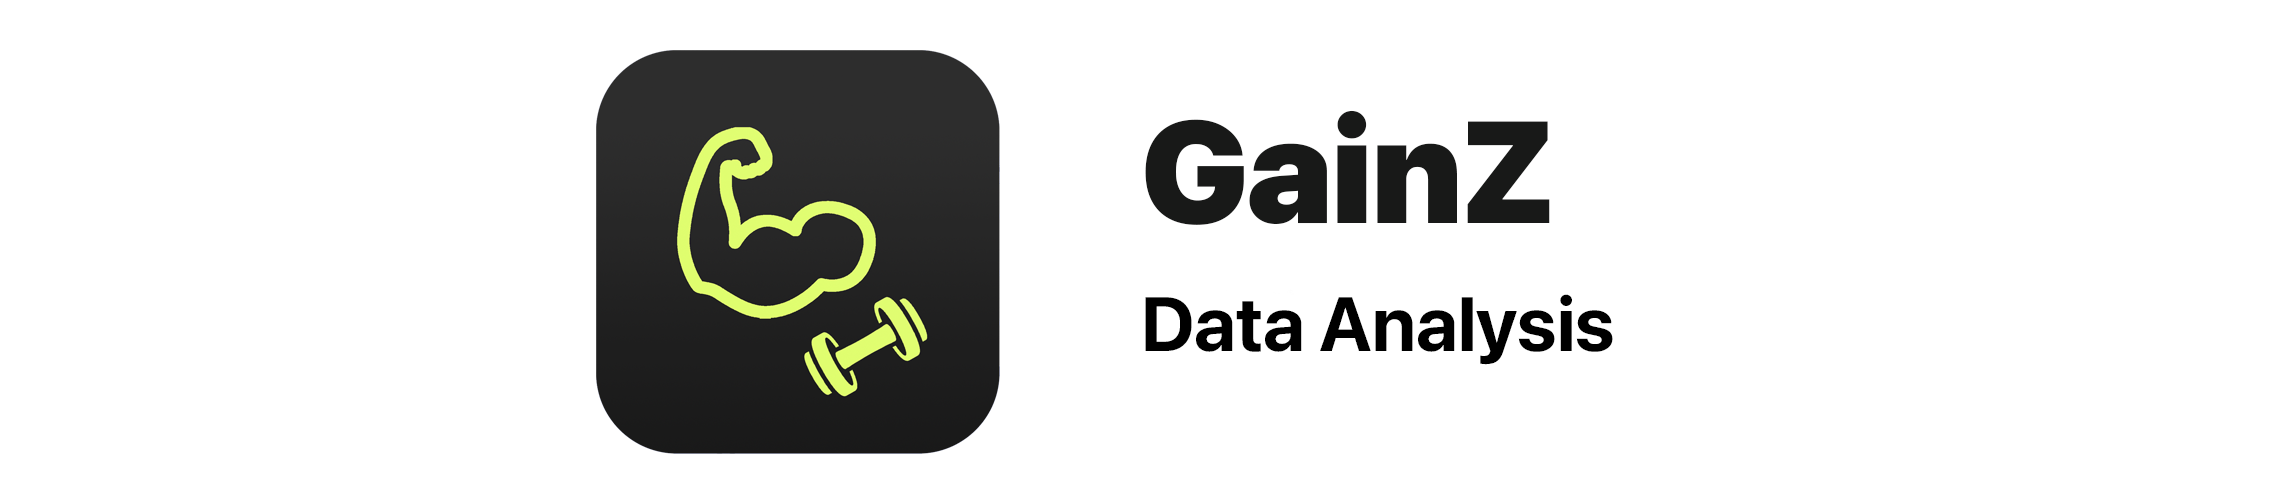

## Import the various libraries to be used:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing the Dataset:

In [2]:
df=pd.read_csv("final_dataset.csv")

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace= True)

In [4]:
df.head()

,type,department,semester,section,gender,age,height,weight,fav_sport,act_level,current_btype,meals,sleep,goal
0,NaN,CSE,6th,A,Male,21,1.8288,68,Gym,high moderate,fit,5,6,Get FIT
1,Faculty,CSE,NaN,NONE,Male,36,1.7526,71,Football,low,fit,2,5,Get FIT
2,Student,CSE,6th,NONE,Male,25,1.8034,52,Volleyball,low,skinny,4,6,Gain-weight
3,Student,CSE,6th,A,Male,21,1.8034,60,Cricket,moderate,skinny,3,6,Gain-weight
4,Student,CSE,6th,NONE,Female,20,1.5748,30,Racing,moderate,fit,3,7,Get FIT


## Handling Missing Values:

In [5]:
df.isnull().sum()

type              1
department        0
semester         40
section           0
gender            0
age               0
height            0
weight            0
fav_sport         0
act_level         0
current_btype     0
meals             0
sleep             0
goal              0
dtype: int64

In [6]:
df.type=df.type.fillna("Student") # Filling missing values in type as "Student"

In [7]:
df.semester=df.semester.fillna("Not Given") # Filling missing values in type as "Not Given"

In [8]:
df.isnull().sum()

type             0
department       0
semester         0
section          0
gender           0
age              0
height           0
weight           0
fav_sport        0
act_level        0
current_btype    0
meals            0
sleep            0
goal             0
dtype: int64

In [10]:
df.dtypes

type              object
department        object
semester          object
section           object
gender            object
age                int64
height           float64
weight             int64
fav_sport         object
act_level         object
current_btype     object
meals              int64
sleep              int64
goal              object
dtype: object

## Adding New attributes:
### BMI:

In [11]:
bmi=df.weight/df.height**2 # calculating and storing the BMI values in an object
df.insert(8,'bmi',bmi,allow_duplicates= True) # Inserting the BMI Attribute into the data
df

### BMI Type, Actual Current Body Type and Goal Suggested:

In [14]:
df.columns

Index(['type', 'department', 'semester', 'section', 'gender', 'age', 'height',
       'weight', 'bmi', 'fav_sport', 'act_level', 'current_btype', 'meals',
       'sleep', 'goal'],
      dtype='object')

In [15]:
df.current_btype.value_counts()

fit                 67
fit but also fat    47
skinny              28
weak                11
fat                 10
Name: current_btype, dtype: int64

In [16]:
index=df.index
index=list(index)
len(index)

163

In [17]:
df.goal.unique()

array(['Get FIT', 'Gain-weight', 'Lose-Weight'], dtype=object)

In [18]:
df.current_btype.unique()

array(['fit', 'skinny', 'weak', 'fat', 'fit but also fat'], dtype=object)

In [19]:
bmi_type=[]
goal_suggested=[]
actual_current_btype=[]

for i in index:
    if df['bmi'][i]<=18:
        bmi_type.append('underweight')
        goal_suggested.append('Gain-weight')
        actual_current_btype.append('weak')
       
    elif df["bmi"][i]>18 and df["bmi"][i]<=20:
        bmi_type.append('healthy')
        goal_suggested.append('Get FIT')
        actual_current_btype.append('skinny')
        
    elif df["bmi"][i]>20 and df["bmi"][i]<=24:
        bmi_type.append('healthy')
        goal_suggested.append('Get FIT')
        actual_current_btype.append('fit')
               
    elif df['bmi'][i]>24 and df["bmi"][i]<30:
        bmi_type.append('over-weight')
        goal_suggested.append('Lose-Weight')
        actual_current_btype.append('fit but also fat')
              
    elif df['bmi'][i]>30 and df["bmi"][i]<=39:
        bmi_type.append('obese')
        goal_suggested.append('Lose-Weight')
        actual_current_btype.append('fat')  
        
    elif df["bmi"][i]>40 and df["bmi"][i]<=65:
        bmi_type.append('extremely-obese')
        goal_suggested.append('Lose-Weight')
        actual_current_btype.append('fat')
        
    else:
           print("NONE!!!")

In [20]:
df.columns

Index(['type', 'department', 'semester', 'section', 'gender', 'age', 'height',
       'weight', 'bmi', 'fav_sport', 'act_level', 'current_btype', 'meals',
       'sleep', 'goal'],
      dtype='object')

In [21]:
df.insert(9,'bmi_type',bmi_type,allow_duplicates= True)
df.insert(16,'goal_suggested',goal_suggested,allow_duplicates= True)
df.insert(13,'actual_current_btype',actual_current_btype,allow_duplicates= True)

# Inserting the attributes into the Dataset


In [22]:
df.columns

Index(['type', 'department', 'semester', 'section', 'gender', 'age', 'height',
       'weight', 'bmi', 'bmi_type', 'fav_sport', 'act_level', 'current_btype',
       'actual_current_btype', 'meals', 'sleep', 'goal', 'goal_suggested'],
      dtype='object')

In [23]:
df=df[ ['type', 'department', 'semester', 'section', 'gender', 'age', 'height',
       'weight', 'bmi', 'bmi_type', 'fav_sport', 'act_level', 'meals', 'sleep','current_btype',
       'goal','actual_current_btype', 'goal_suggested']]

In [24]:
df.head()

,type,department,semester,section,gender,age,height,weight,bmi,bmi_type,fav_sport,act_level,meals,sleep,current_btype,goal,actual_current_btype,goal_suggested
0,Student,CSE,6th,A,Male,21,1.8288,68,20.331831,healthy,Gym,high moderate,5,6,fit,Get FIT,fit,Get FIT
1,Faculty,CSE,Not Given,NONE,Male,36,1.7526,71,23.114938,healthy,Football,low,2,5,fit,Get FIT,fit,Get FIT
2,Student,CSE,6th,NONE,Male,25,1.8034,52,15.988923,underweight,Volleyball,low,4,6,skinny,Gain-weight,weak,Gain-weight
3,Student,CSE,6th,A,Male,21,1.8034,60,18.448757,healthy,Cricket,moderate,3,6,skinny,Gain-weight,skinny,Get FIT
4,Student,CSE,6th,NONE,Female,20,1.5748,30,12.096798,underweight,Racing,moderate,3,7,fit,Get FIT,weak,Gain-weight


## Cleaning `fav_sport`:

In [25]:
print(len(df.fav_sport.unique()))
df.fav_sport.unique()

22


array(['Gym', 'Football', 'Volleyball', 'Cricket', 'Racing', 'None',
       'Badminton', 'Basketball', 'Table Tennis ', 'Chess',
       'Table tennis', 'Listening songs ', 'Gym and boxing n kabaddi',
       'Swimming', 'Kho-Kho', 'Tannis', 'Pubg', 'BadMinton ', 'Chess ',
       'Kabaddi ', 'Bedminton', 'Badminton '], dtype=object)

In [274]:
df.fav_sport.value_counts()

Cricket          60
Gym              35
Volleyball       17
Football         17
Basketball       13
Badminton         7
Table Tennis      3
Badminton         3
None              2
Kho-Kho           1
Kabaddi           1
Swimming          1
Chess             1
Racing            1
Chess             1
Name: fav_sport, dtype: int64

In [27]:
df['fav_sport'][df['fav_sport']=='Table tennis']='Table Tennis '
df['fav_sport'][df['fav_sport']=='Tannis']='Table Tennis '
df['fav_sport'][df['fav_sport']=='Listening songs ']='Cricket'
df['fav_sport'][df['fav_sport']=='Bedminton']='Badminton '
df['fav_sport'][df['fav_sport']=='BadMinton ']='Badminton '
df['fav_sport'][df['fav_sport']=='Gym and boxing n kabaddi']='Gym'
df['fav_sport'][df['fav_sport']=='Pubg']='Basketball'

In [28]:
print(len(df.fav_sport.unique()))
df.fav_sport.unique()

15


array(['Gym', 'Football', 'Volleyball', 'Cricket', 'Racing', 'None',
       'Badminton', 'Basketball', 'Table Tennis ', 'Chess', 'Swimming',
       'Kho-Kho', 'Badminton ', 'Chess ', 'Kabaddi '], dtype=object)

In [29]:
df.fav_sport.value_counts()

Cricket          60
Gym              35
Volleyball       17
Football         17
Basketball       13
Badminton         7
Table Tennis      3
Badminton         3
None              2
Kho-Kho           1
Kabaddi           1
Swimming          1
Chess             1
Racing            1
Chess             1
Name: fav_sport, dtype: int64

In [30]:
df.columns

Index(['type', 'department', 'semester', 'section', 'gender', 'age', 'height',
       'weight', 'bmi', 'bmi_type', 'fav_sport', 'act_level', 'meals', 'sleep',
       'current_btype', 'goal', 'actual_current_btype', 'goal_suggested'],
      dtype='object')

In [31]:
df=df[['type', 'department', 'semester', 'section', 'gender', 'age', 'height',
       'weight', 'bmi', 'bmi_type', 'fav_sport', 'act_level', 'meals', 'sleep',
       'current_btype', 'actual_current_btype' ,'goal', 'goal_suggested']]

## Final Dataset:

In [32]:
df.head()

,type,department,semester,section,gender,age,height,weight,bmi,bmi_type,fav_sport,act_level,meals,sleep,current_btype,actual_current_btype,goal,goal_suggested
0,Student,CSE,6th,A,Male,21,1.8288,68,20.331831,healthy,Gym,high moderate,5,6,fit,fit,Get FIT,Get FIT
1,Faculty,CSE,Not Given,NONE,Male,36,1.7526,71,23.114938,healthy,Football,low,2,5,fit,fit,Get FIT,Get FIT
2,Student,CSE,6th,NONE,Male,25,1.8034,52,15.988923,underweight,Volleyball,low,4,6,skinny,weak,Gain-weight,Gain-weight
3,Student,CSE,6th,A,Male,21,1.8034,60,18.448757,healthy,Cricket,moderate,3,6,skinny,skinny,Gain-weight,Get FIT
4,Student,CSE,6th,NONE,Female,20,1.5748,30,12.096798,underweight,Racing,moderate,3,7,fit,weak,Get FIT,Gain-weight


In [33]:
df.describe() # To calculate the various Satistical values:

,age,height,weight,bmi,meals,sleep
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,21.208589,1.696969,60.834356,21.067463,2.969325,7.079755
std,4.650042,0.104100,13.056508,3.994059,0.757052,0.909359
min,17.000000,1.371600,30.000000,12.096798,0.000000,5.000000
25%,19.000000,1.625600,50.000000,18.197800,3.000000,6.000000
50%,20.000000,1.701800,60.000000,20.331831,3.000000,7.000000
75%,21.000000,1.778000,70.000000,23.782926,3.000000,8.000000
max,43.000000,1.905000,94.000000,36.319045,5.000000,8.000000


# Correlational for the various Attributes:

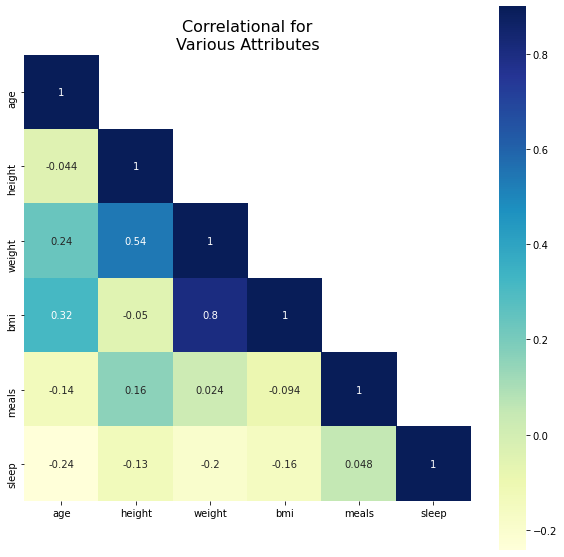

In [279]:
corr=df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu");
plt.title('Correlational for\nVarious Attributes', fontsize=16);

#### Positive Correlational:
1. `bmi` and `weight` has the high Positive Correlation of **0.8**<br>
2. `height` and `weight` has Positive Correlation of **0.54**<br>
3. `age` and `bmi` has Positive Correlation of **0.32**<br>

#### Negative Coorelational:
1. `sleep` and `age` has Negative Correlation of **-0.24**<br>
2. `sleep` and `bmi` has Negative Correlation of **-0.16**<br>
3. `meals` and `age` has Negative Correlation of **-0.14**<br>
4. `sleep` and `height` has Negative Correlation of **-0.13**<br>

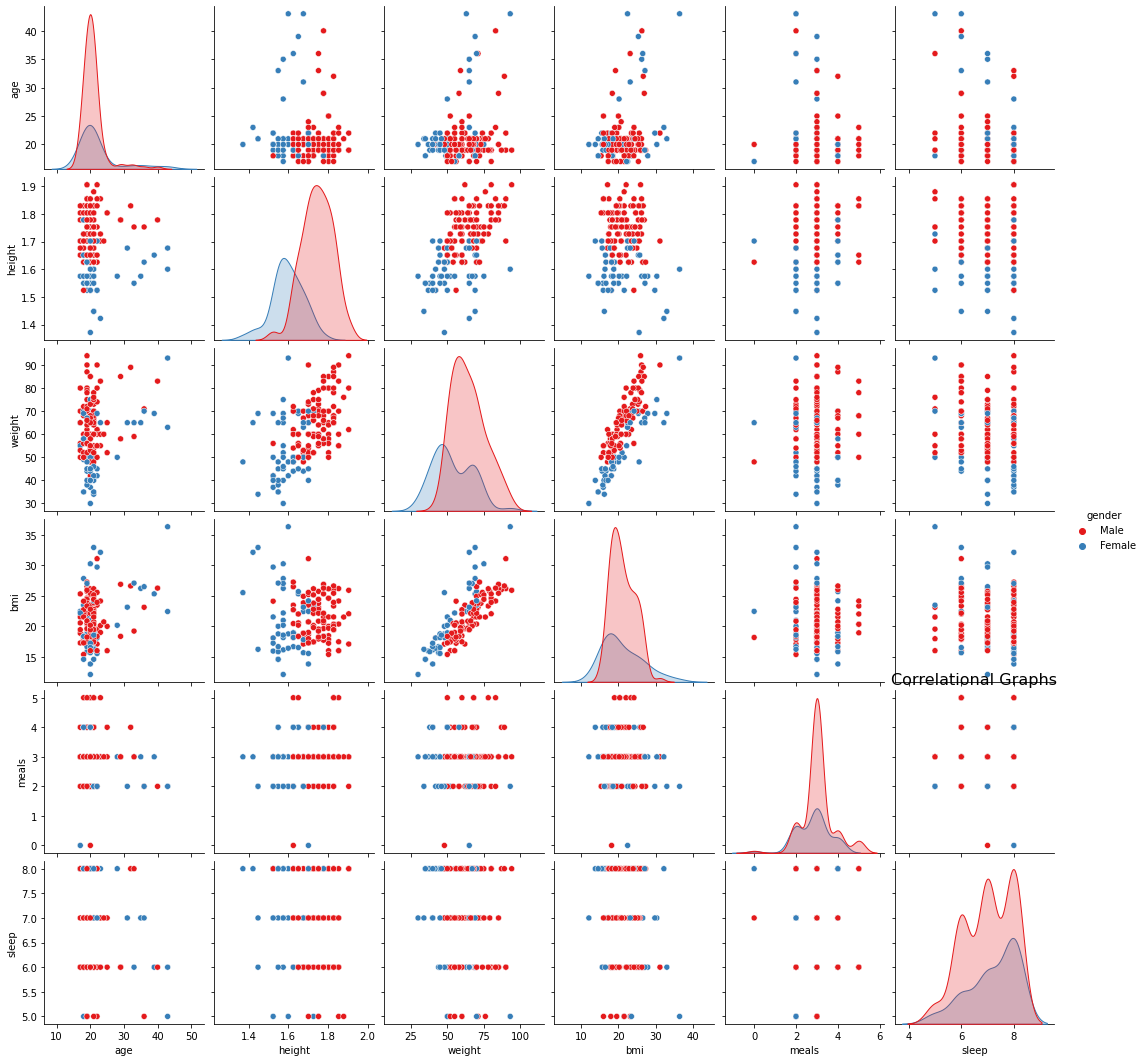

In [176]:
sns.pairplot(df,hue='gender',palette='Set1');

# Univariate Analysis:


## 1. Analysing Gender:

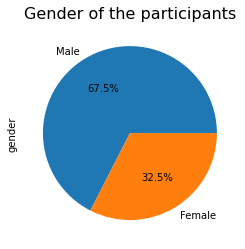

In [175]:
df.gender.value_counts().plot.pie(autopct="%.1f%%");
plt.title('Gender of the participants', fontsize=16);

* From the Pie Chart it can be depicted that **67.5%** of the participants are Male 

## 2. Analysing Type of Participants:

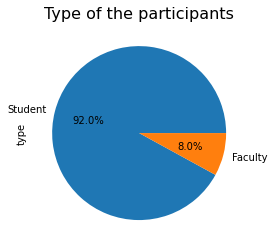

In [174]:
df.type.value_counts().plot.pie(autopct="%.1f%%");
plt.title('Type of the participants', fontsize=16);

* Only **8%** of the Faculty had volunteered

## 3. Analysing Department:

CSE                 108
ECE                  22
ME                   17
CE                   15
AS (for faculty)      1
Name: department, dtype: int64


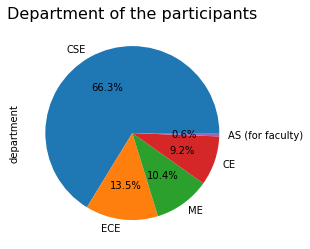

In [288]:
print( df.department.value_counts())

df.department.value_counts().plot.pie(autopct="%.1f%%");
plt.title('Department of the participants', fontsize=16);

* Most of the participants were from the **CSE Department: *67%* (108)** followed by **ECE Department: *13.5%* (22)**
* The number of participants from **CE Department** and **ME Department** were close
* A single Participant from **AS Department** which is a faculty member also

## 4. Analysing BMI Type:

healthy        90
underweight    35
over-weight    33
obese           5
Name: bmi_type, dtype: int64


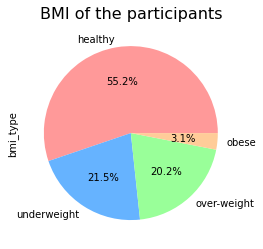

In [289]:
data=df.bmi_type.value_counts()
print(data)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

data.plot.pie(autopct="%.1f%%",colors=colors);
plt.title('BMI of the participants', fontsize=16);

Based on the Calculated BMI from the data Collected:
* Most of the Participants fall under the category of **Healthy: 55.2%(90)**
* **21.5%** of the participants fall under the category of **Under-weight**
* **20.2%** of the participants fall under the category of **Over-weight**
* only **3%** fall under the category of **Obese**<br>

It can be concluded that there is a high volume of participants who are Under-Weight, and very low volume of participants are **Obese**

## 5. Analysing Activity Level:

moderate         68
low              39
high moderate    29
very high        24
hypteractive      3
Name: act_level, dtype: int64


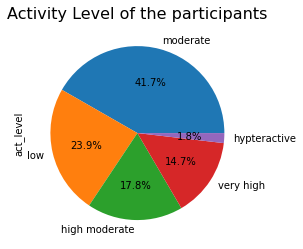

In [171]:
data=df.act_level.value_counts()
print(data)
data.plot.pie(autopct="%.1f%%");
plt.title('Activity Level of the participants', fontsize=16);

Based on the Information Collected from the Participants:
* **41.7%** of the participants have **Moderate Activity Level *(light exercise sport 1-3 times per week)***
* **23.9%** of the participants have **Low Activity Level *(little or no exercise)***

It can be concluded that the participants are more likely to have **Low Activity level** and only a few of them fall under **Hyper Active**

## 6. Analysing BMI:

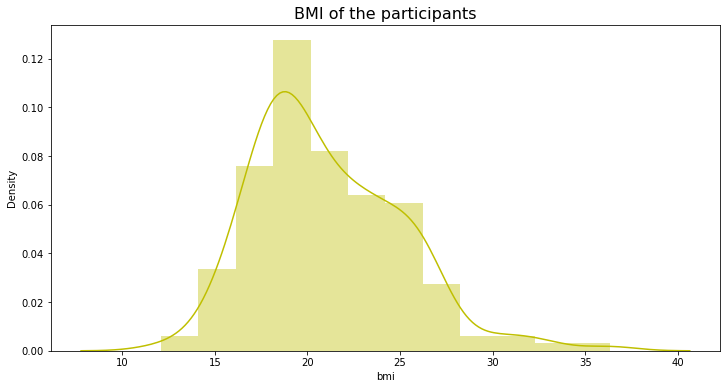

In [271]:
plt.figure(figsize=(12, 6))
sns.distplot(df['bmi'],color="y");
plt.title('BMI of the participants', fontsize=16);

* **BMI** for most the participants falls under range of **17-23**
* Very few participants have **BMI** under **15** and above **25**

# Bivariate analysis:

## 1. Analysing the Height and Weight Features:

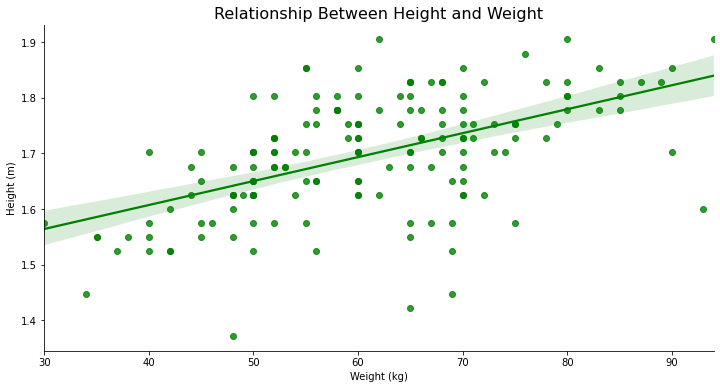

In [280]:
plt.figure(figsize=(12,6))

sns.regplot(x='weight', y='height', data=df, color='g')

plt.title('Relationship Between Height and Weight', fontsize=16)
plt.ylabel('Height (m)')
plt.xlabel('Weight (kg)')
sns.despine()

plt.show()

There is a Linear Relationship between **Height** and **Weight**

## 2. Analysing the Age and BMI Features:

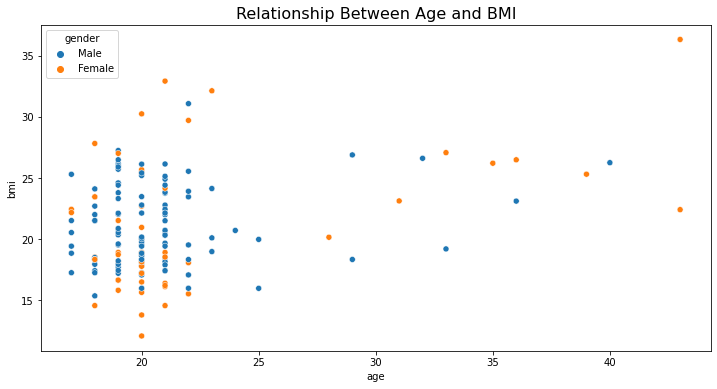

In [273]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="age",y="bmi",hue="gender",data=df)
plt.title('Relationship Between Age and BMI', fontsize=16);

It is depicted from the Plot that:
* Most of the participants fall under the  age of **20-25 Years** with **BMI** within the range of **15 to 25**
* It is visible that most of the **Female** participants fall under the **BMI** range of **30 and above**
* From the Participants above the age of **25 years**, more of the females have  **BMI** within the range of **15 to 25**<br>




## 3. Analysing the Age and Weight Features:

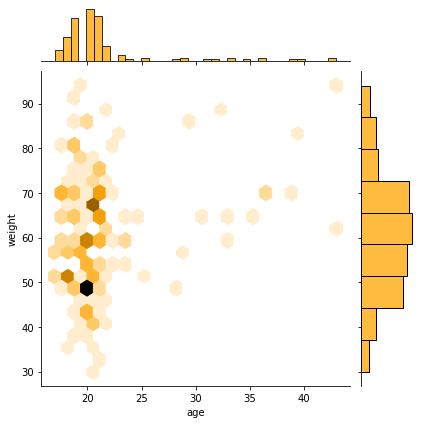

In [282]:
sns.jointplot(x='age',y='weight',data=df,kind='hex',color="orange");

From the plot it can be said:
* From the Participants of **Age** around **20 years**, most of them has weight of **60-70kg**
* Very few participants have **Weight** above **80kg**
* The participants who were **Faculty** fall under the **Weight** range of **45-70kg**

## 4. Analysing Meals and BMI:

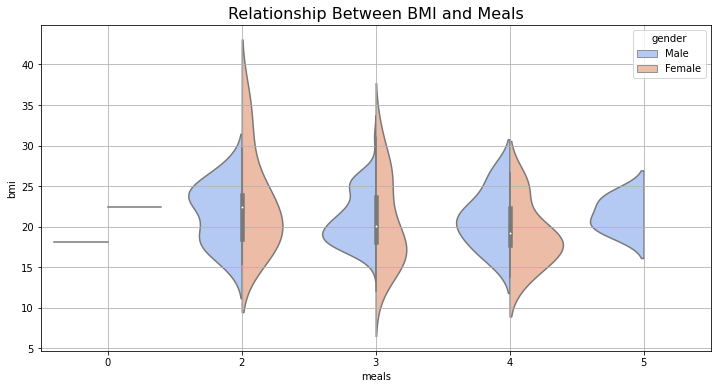

In [267]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_size_inches(12,6)
sns.violinplot(x="meals", y="bmi", data=df, hue='gender',split=True,palette='coolwarm').grid()
plt.title('Relationship Between BMI and Meals', fontsize=16);

From the plot it can be said:
* Participants who were **Female** and take **4 Meals** a day, has BMI in range of **15 to 20**
* Participants who were **Male** and take **4 Meals** a day, has BMI in range of **20 to 25**
* Participants who were **Female** with **BMI** of range **30-40** take **2 or 3 meals** a day

It can be concluded that even after taking just 2-3 meals a day, few of the Female Participants have BMI in the range of 30-40. Most of the Male Participants have BMI in the range of 15-30. Also it can be said that the amount of Meals per day cannot define whether a Person is Under-Weight or Obese, but the Quality of Food.

## 4. Analysing Meals and Activity Level:

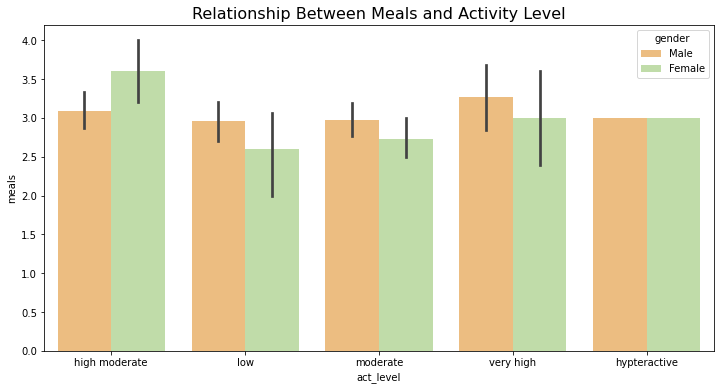

In [283]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_size_inches(12,6)
sns.barplot(x="act_level",
                    y="meals",hue="gender",
                    data=df, palette="Spectral");
plt.title('Relationship Between Meals and Activity Level', fontsize=16);

From the plot it can be said:
* The **Female** participants with **Activity Level** of **High Moderate** take around **3.5 Meals**
* The **Male** participants with **Activity Level** of **Very High** take around **3 Meals**
* The **Female** participants with **Activity Level** of **Low** take around **2.5 Meals**
* The **Male** participants with **Activity Level** of **Low** take around **3 Meals**<br>

It can be concluded that participants who take 3.5 meals a day have Activity Level of High Moderate. So, the number of meals a day does affect the Activity Level of a participant

## 5. Analysing the Goal and Current Body Type:

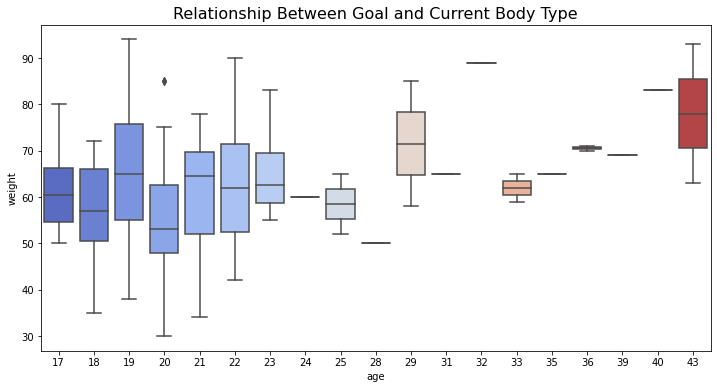

In [285]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_size_inches(12,6)
sns.boxplot(x="age", y="weight",data=df, palette="coolwarm");
plt.title('Relationship Between Goal and Current Body Type', fontsize=16);

## 6. Analysing the Favourite Sport and Department:


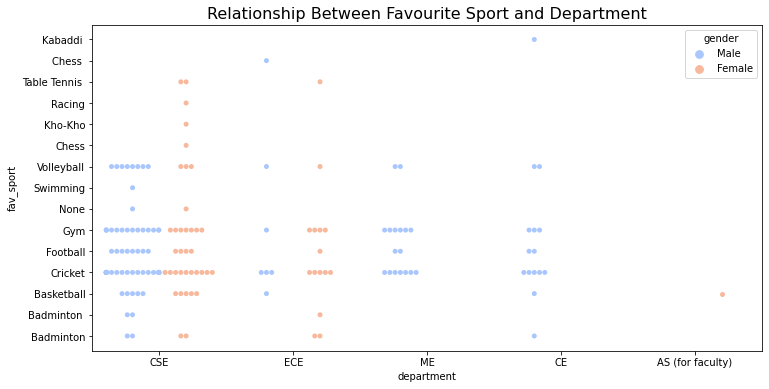

In [286]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_size_inches(12,6)
sns.swarmplot(x="department", y="fav_sport",hue='gender',data=df, palette="coolwarm",split=True);
plt.title('Relationship Between Favourite Sport and Department', fontsize=16);

From the plot it can be said:
* More of the **Male** participants likes **Cricket** than **Female** participants
* More of the **Female** participants likes **Badminton** than **Male** participants

# Conclusion:

## Participants whose current_btype varies <br> from what it actually should be:

In [261]:
data= df[['type','department','gender','bmi_type','current_btype','actual_current_btype','goal','goal_suggested']][(df.current_btype!=df.actual_current_btype)]
print("Number of participants whose current_btype varies\nfrom what it actually should be: ",len(data),"Participants,","{:.2f} %".format((len(data)/len(df))*100) )
data.head()

Number of participants whose current_btype varies
from what it actually should be:  103 Participants, 63.19 %


,type,department,gender,bmi_type,current_btype,actual_current_btype,goal,goal_suggested
2,Student,CSE,Male,underweight,skinny,weak,Gain-weight,Gain-weight
4,Student,CSE,Female,underweight,fit,weak,Get FIT,Gain-weight
6,Student,CSE,Male,healthy,weak,skinny,Gain-weight,Get FIT
8,Student,CSE,Male,underweight,skinny,weak,Gain-weight,Gain-weight
9,Student,CSE,Male,healthy,skinny,fit,Gain-weight,Get FIT


## Participants whose current_btype is same as<br>what it actually should be:

In [259]:
data= df[['type','department','gender','bmi_type','current_btype','actual_current_btype','goal','goal_suggested']][~(df.current_btype!=df.actual_current_btype)]
print("Number of participants whose current_btype is same as \nwhat it actually should be: ",len(data),"Participants,","{:.2f} %".format((len(data)/len(df))*100) )
data.head()

Number of participants whose current_btype is same as 
what it actually should be:  60 Participants, 36.81 %


,type,department,gender,bmi_type,current_btype,actual_current_btype,goal,goal_suggested
0,Student,CSE,Male,healthy,fit,fit,Get FIT,Get FIT
1,Faculty,CSE,Male,healthy,fit,fit,Get FIT,Get FIT
3,Student,CSE,Male,healthy,skinny,skinny,Gain-weight,Get FIT
5,Student,CSE,Male,healthy,fit,fit,Get FIT,Get FIT
7,Student,CSE,Male,obese,fat,fat,Lose-Weight,Lose-Weight


## Participants whose Goal varies <br> from what it actually should be:

In [262]:
data= df[['type','department','gender','bmi_type','current_btype','actual_current_btype','goal','goal_suggested']][ (df.goal!=df.goal_suggested) ]
print("Number of participants whose Goal\nvaries from what it actually should be: ",len(data),"Participants,","{:.2f} %".format((len(data)/len(df))*100) )
data.head()

Number of participants whose Goal
varies from what it actually should be:  75 Participants, 46.01 %


,type,department,gender,bmi_type,current_btype,actual_current_btype,goal,goal_suggested
3,Student,CSE,Male,healthy,skinny,skinny,Gain-weight,Get FIT
4,Student,CSE,Female,underweight,fit,weak,Get FIT,Gain-weight
6,Student,CSE,Male,healthy,weak,skinny,Gain-weight,Get FIT
9,Student,CSE,Male,healthy,skinny,fit,Gain-weight,Get FIT
12,Student,CSE,Female,healthy,fit but also fat,fit,Lose-Weight,Get FIT


## Participants whose Goal is same as<br>what it actually should be:

In [264]:
data= df[['type','department','gender','bmi_type','current_btype','actual_current_btype','goal','goal_suggested']][ (df.goal==df.goal_suggested) ]
print("Number of participants whose Goal is same as\n what they actually should be: ",len(data),"Participants,","{:.2f} %".format((len(data)/len(df))*100) )
data.head()

Number of participants whose Goal is same as
 what they actually should be:  88 Participants, 53.99 %


,type,department,gender,bmi_type,current_btype,actual_current_btype,goal,goal_suggested
0,Student,CSE,Male,healthy,fit,fit,Get FIT,Get FIT
1,Faculty,CSE,Male,healthy,fit,fit,Get FIT,Get FIT
2,Student,CSE,Male,underweight,skinny,weak,Gain-weight,Gain-weight
5,Student,CSE,Male,healthy,fit,fit,Get FIT,Get FIT
7,Student,CSE,Male,obese,fat,fat,Lose-Weight,Lose-Weight


## Participants whose current_btype and Goal varies <br> from what they actually should be:

In [253]:
data= df[['type','department','gender','bmi_type','current_btype','actual_current_btype','goal','goal_suggested']][~(df.current_btype==df.actual_current_btype) & (df.goal==df.goal_suggested) ]
print("Number of participants whose current_btype and\ngoal varies from what they actually should be: ",len(data),"Participants,","{:.2f} %".format((len(data)/len(df))*100) )
data.head()

Number of participants whose current_btype and
goal varies from what they actually should be:  53 Participants, 32.52 %


,type,department,gender,bmi_type,current_btype,actual_current_btype,goal,goal_suggested
2,Student,CSE,Male,underweight,skinny,weak,Gain-weight,Gain-weight
8,Student,CSE,Male,underweight,skinny,weak,Gain-weight,Gain-weight
14,Student,ECE,Female,healthy,fit,skinny,Get FIT,Get FIT
17,Student,ECE,Female,healthy,fit,skinny,Get FIT,Get FIT
18,Student,ECE,Female,healthy,fit but also fat,skinny,Get FIT,Get FIT


## Participants whose current_btype is same as<br>what it actually should be:

In [265]:
data= df[['type','department','gender','bmi_type','current_btype','actual_current_btype','goal','goal_suggested']][(df.current_btype==df.actual_current_btype) & (df.goal==df.goal_suggested) ]
print("Number of participants whose current_btype and\ngoal is same as what they actually should be: ",len(data),"Participants,","{:.2f} %".format((len(data)/len(df))*100) )
data.head()

Number of participants whose current_btype and
goal is same as what they actually should be:  35 Participants, 21.47 %


,type,department,gender,bmi_type,current_btype,actual_current_btype,goal,goal_suggested
0,Student,CSE,Male,healthy,fit,fit,Get FIT,Get FIT
1,Faculty,CSE,Male,healthy,fit,fit,Get FIT,Get FIT
5,Student,CSE,Male,healthy,fit,fit,Get FIT,Get FIT
7,Student,CSE,Male,obese,fat,fat,Lose-Weight,Lose-Weight
10,Faculty,ECE,Female,over-weight,fit but also fat,fit but also fat,Lose-Weight,Lose-Weight
